In [44]:
import json 

all_pair_maps = {
    "pair_params_map_2_neg01_00",
    "pair_params_map_2_00_02" ,
    "pair_params_map_2_02_04" ,
    "pair_params_map_2_04_07",
    "pair_params_map_3_00_02" ,
    "pair_params_map_3_02_04" ,
    "pair_params_map_4_00_02" 
}


corr_res_MAC_V = []

for name in all_pair_maps:
    with open(f'/Users/cs/Desktop/results_MAC_Vset_pair_params/results_MAC_Vset_{name}.json') as file:
        data = json.load(file)
        corr_res_MAC_V.append(data)


In [45]:
# for i in corr_res_MAC_V:
#     print(i)

for i in corr_res_MAC_V[:len(corr_res_MAC_V) ]:
    print('-----')
    for j in i:
        
        print(j["cv_sets"]["overall_metrics"]["precision_up"] , '-' ,j["cv_sets"]["overall_metrics"]["recall_up"] ,j["combo_numbers"])

-----
100.0 - 40.0 [2, 11]
50.0 - 16.666666666666664 [0, 4]
None - 0 [13, 21]
None - 0 [12, 19]
66.66666666666666 - 40.0 [2, 16]
100.0 - 33.33333333333333 [8, 23]
100.0 - 28.57142857142857 [5, 7]
None - 0 [11, 15]
100.0 - 20.0 [6, 23]
0.0 - 0.0 [5, 24]
-----
None - 0 [1, 4, 5, 15]
None - 0 [5, 15, 18, 21]
None - 0 [3, 4, 5, 15]
None - 0 [5, 8, 9, 18]
None - 0 [2, 5, 13, 15]
None - 0 [1, 5, 13, 15]
None - 0 [8, 9, 18, 22]
None - 0 [3, 5, 12, 15]
None - 0 [2, 4, 5, 15]
None - 0 [2, 5, 12, 15]
-----
50.0 - 28.57142857142857 [0, 5]
66.66666666666666 - 28.57142857142857 [0, 11]
100.0 - 28.57142857142857 [7, 16]
50.0 - 14.285714285714285 [4, 19]
66.66666666666666 - 25.0 [5, 11]
66.66666666666666 - 28.57142857142857 [0, 19]
50.0 - 16.666666666666664 [9, 19]
75.0 - 50.0 [3, 7]
None - 0 [10, 15]
75.0 - 50.0 [2, 7]
-----
None - 0 [3, 15]
100.0 - 16.666666666666664 [14, 21]
None - 0 [3, 12]
100.0 - 28.57142857142857 [0, 16]
100.0 - 25.0 [3, 4]
100.0 - 16.666666666666664 [15, 23]
None - 0 [13, 16]

In [35]:
corr_res_MAC_V

[[{'combo_number': 1,
   'parameters': [{'learning_rate': 0.05,
     'num_epochs': 150,
     'batch_size': 50,
     'use_bidirectional': False,
     'lag': 3,
     'input_size': 12,
     'hidden_size': 55,
     'num_layers': 1,
     'use_monthly_dfs_only': True,
     'use_binary_0_1_retRate': False,
     'use_binary_neg1_1': False,
     'use_ret_rate': False,
     'use_print_acc': False,
     'use_dropout': False,
     'use_class_weighting': False,
     'is_deterministic': True,
     'seed_num': 42,
     'use_monthly_predictor': False,
     'use_existing_lagged_data': True,
     'use_dynamic_weights': False,
     'use_monthly_daily_end_mo_predictor': False,
     'use_monthly_weekly_end_mo_predictor': True,
     'use_binary_0_1_retRate_custom_neg': True,
     'use_binary_0_1_retRate_custom_pos': False,
     'binary_0_1_cutoff_ret_rate_percentage': 0.05,
     'end_value_train_set_fraction': 0.85,
     'val_set_fraction': 0.1,
     'num_folds': 8,
     'POS_weight_multiplier': 0.7,
     '

In [ ]:
# #------------------------------------------------------------------------------------------------------------------------
# #                                             ABOUT 

# #       - all functions will be defined here, and imported into a notebook as needed
# #       - functions that are currently being tested (ie. as of Aug 5 ensemble functions) will not be fully here (may be in part)
# #       - Another Equations.py file is likely to be created later if needed 


# #------------------------------------------------------------------------------------------------------------------------






# import pandas as pd
# import pickle
# import random
# import numpy as np
# import os
# import itertools
# from joblib import Parallel, delayed
# from collections import defaultdict
# import math
# import torch.nn as nn


# import torch

# #/home/charifslmn/


# # with open('/home/charifslmn/short_dfs.pkl', 'rb') as f:
# #     loaded_dfs = pickle.load(f)

# # with open("/home/charifslmn/lagged_cache.pkl", "rb") as f:
# #     lagged_cache = pickle.load(f)

# with open('/Users/cs/Desktop/Oil-LSTM-Project-2/short_dfs.pkl', 'rb') as f:
#     loaded_dfs = pickle.load(f)

# with open("/Users/cs/Desktop/Oil-LSTM-Project-2/lagged_cache.pkl", "rb") as f:
#     lagged_cache = pickle.load(f)

# #*#*#* CHANGED: Set torch.backends.cudnn.enabled = True to ensure cuDNN is enabled for NVIDIA GPU acceleration.
# torch.backends.cudnn.enabled = True

# def format_to_tensor(df_merged, lag_steps, target_col="wti_value", date_col="wti_pred_date"):
#     tensor_formatted_data = []
#     predictor_data_wti_vals = df_merged[target_col].to_numpy()
#     prediction_dates = df_merged[date_col].to_numpy()
#     lagged_cols = {}
#     for lag in range(1, lag_steps + 1):
#         cols = sorted([col for col in df_merged.columns if f't_minus{lag}_' in col])
#         lagged_cols[lag] = cols
#     for i in range(len(df_merged)):
#         sample = []
#         for lag in range(lag_steps, 0, -1):
#             sample.append(df_merged.loc[i, lagged_cols[lag]].tolist())
#         tensor_formatted_data.append(sample)
#     return np.array(tensor_formatted_data), np.array(predictor_data_wti_vals), np.array(prediction_dates)

# from torch.utils.data import Dataset

# class TimeSeriesDataset(Dataset):
#     def __init__(self, X, y):
#         self.X = X
#         self.y = y
#     def __len__(self):
#         return len(self.X)
#     def __getitem__(self, i):
#         return self.X[i], self.y[i]

# import torch.nn as nn

# class LSTM(nn.Module):
#     def __init__(self, input_size, hidden_size, num_stacked_layers, use_bidirectional, use_dropout):
#         super().__init__()
#         self.hidden_size = hidden_size
#         self.num_stacked_layers = num_stacked_layers
#         self.bi_dir = 2 if use_bidirectional else 1
#         # Only use dropout if use_dropout is True AND num_stacked_layers > 1
#         if use_dropout and num_stacked_layers > 1:
#             dropout_rate = 0.25
#         else:
#             dropout_rate = 0.0
#         self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers,
#                             dropout=dropout_rate, bias=True, batch_first=True,
#                             bidirectional=use_bidirectional)
#         self.fc = nn.Linear(hidden_size * self.bi_dir, 1)
#     def forward(self, x):
#         device = x.device
#         batch_size = x.size(0)
#         h0 = torch.zeros(self.num_stacked_layers * self.bi_dir, batch_size, self.hidden_size, device=device)
#         c0 = torch.zeros(self.num_stacked_layers * self.bi_dir, batch_size, self.hidden_size, device=device)
#         out, (hn, cn) = self.lstm(x, (h0, c0))
#         out = self.fc(out[:, -1, :])
#         return out

# def train_one_epoch(model, train_loader, optimizer, loss_function,train_losses):
#     model.train(True)
#     running_loss = 0.0
#     total_loss = 0.0
#     device = next(model.parameters()).device
#     for batch_index, batch in enumerate(train_loader):
#         x_batch, y_batch = batch[0].to(device), batch[1].to(device)
#         output = model(x_batch)
#         y_batch = y_batch.view(-1, 1)
#         loss = loss_function(output, y_batch)
#         loss_value = loss.item()
#         running_loss += loss_value
#         total_loss += loss_value
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
#     avg_epoch_loss = total_loss / len(train_loader)
#     train_losses.append(avg_epoch_loss)

# def validate_one_epoch(model, val_loader, loss_function,val_losses):
    
#     device = next(model.parameters()).device
#     model.train(False)
#     running_loss = 0.0
#     for batch_index, batch in enumerate(val_loader):
#         x_batch, y_batch = batch[0].to(device), batch[1].to(device)
#         with torch.no_grad():
#             output = model(x_batch)
#             y_batch = y_batch.view(-1, 1)
#             loss = loss_function(output, y_batch)
#             running_loss += loss.item()
#     avg_loss_across_batches = running_loss / len(val_loader)
#     val_losses.append(avg_loss_across_batches)



# import numpy as np

# def evaluate_binary_0_1(predicted_array, actual_array,one_fold:bool ,do_print : bool):

#     if not one_fold:
            
#         predicted_array = [int(pred) for fold in predicted_array for pred in fold]
#         actual_array = [int(pred) for fold in actual_array for pred in fold]

#         predicted_array = np.array(predicted_array)
#         actual_array = np.array(actual_array)

    
#     pred_direction = (predicted_array > 0.5).astype(int)
#     actual_direction = (actual_array > 0.5).astype(int)
#     correct = (pred_direction == actual_direction).astype(int)
    
#     accuracy = correct.sum() / len(correct) * 100
#     actual_ups = (actual_direction == 1)
#     predicted_ups = (pred_direction == 1)
#     true_positives_up = (predicted_ups & actual_ups).sum()
#     precision_up = true_positives_up / predicted_ups.sum() * 100 if predicted_ups.sum() > 0 else float('nan')
#     recall_up = true_positives_up / actual_ups.sum() * 100 if actual_ups.sum() > 0 else float('nan')
#     actual_downs = (actual_direction == 0)
#     predicted_downs = (pred_direction == 0)
#     true_positives_down = (predicted_downs & actual_downs).sum()
#     precision_down = true_positives_down / predicted_downs.sum() * 100 if predicted_downs.sum() > 0 else float('nan')
#     recall_down = true_positives_down / actual_downs.sum() * 100 if actual_downs.sum() > 0 else float('nan')

#     if actual_ups.sum() == 0 and predicted_ups.sum() == 0:
#         precision_up = None
#         recall_up = None

#     if actual_ups.sum() == 0 and predicted_ups.sum() > 0:
#         precision_up = 0
#         recall_up = None      

#     if actual_ups.sum() > 0 and predicted_ups.sum() == 0:
#         precision_up = None
#         recall_up = 0

#         ####################################

#     if actual_downs.sum() == 0 and predicted_downs.sum() == 0:
#         precision_down = None
#         recall_down = None

#     if actual_downs.sum() == 0 and predicted_downs.sum() > 0:
#         precision_down = 0
#         recall_down = None
    
#     if actual_downs.sum() > 0 and predicted_downs.sum() == 0:
#         precision_down = None
#         recall_down = 0


#     if do_print:
#         print(f"Directional Accuracy: {accuracy:.2f}%")
#         print(f'Up Precision: {precision_up:.2f}%')
#         print(f'Up Recall:    {recall_up:.2f}%')
#         print(f'Down Precision: {precision_down:.2f}%')
#         print(f'Down Recall:    {recall_down:.2f}%')
#     return {
#         'accuracy': accuracy,
#         'precision_up': precision_up,
#         'recall_up': recall_up,
#         'precision_down': precision_down,
#         'recall_down': recall_down,
#     }




# def evaluate_signed_neg1_1(predicted_array, actual_array,do_print : bool ):
#     T = len(actual_array)
#     correct = [1 if predicted_array[i] * actual_array[i] > 0 else 0 for i in range(1, T)]
#     accuracy = sum(correct) / len(correct) * 100
#     actual_ups = actual_array > 0
#     predicted_ups = predicted_array > 0
#     true_positives_up = (predicted_ups & actual_ups).sum()
#     precision_up = true_positives_up / predicted_ups.sum() * 100 if predicted_ups.sum() > 0 else float('nan')
#     recall_up = true_positives_up / actual_ups.sum() * 100 if actual_ups.sum() > 0 else float('nan')
#     actual_downs = actual_array < 0
#     predicted_downs = predicted_array < 0
#     true_positives_down = (predicted_downs & actual_downs).sum()
#     precision_down = true_positives_down / predicted_downs.sum() * 100 if predicted_downs.sum() > 0 else float('nan')
#     recall_down = true_positives_down / actual_downs.sum() * 100 if actual_downs.sum() > 0 else float('nan')



#     if actual_ups.sum() == 0 and predicted_ups.sum() == 0:
#         precision_up = None
#         recall_up = None

#     if actual_ups.sum() == 0 and predicted_ups.sum() > 0:
#         precision_up = 0
#         recall_up = None

#     if actual_ups.sum() > 0 and predicted_ups.sum() == 0:
#         precision_up = None
#         recall_up = 0

#         ####################################

#     if actual_downs.sum() == 0 and predicted_downs.sum() == 0:
#         precision_down = None
#         recall_down = None

#     if actual_downs.sum() == 0 and predicted_downs.sum() > 0:
#         precision_down = 0
#         recall_down = None
    
#     if actual_downs.sum() > 0 and predicted_downs.sum() == 0:
#         precision_down = None
#         recall_down = 0


#     if do_print:
#         print(f"Directional Accuracy: {accuracy:.2f}%")
#         print(f'Up Precision: {precision_up:.2f}%')
#         print(f'Up Recall:    {recall_up:.2f}%')
#         print(f'Down Precision: {precision_down:.2f}%')
#         print(f'Down Recall:    {recall_down:.2f}%')
#     return {
#         'accuracy': accuracy,
#         'precision_up': precision_up,
#         'recall_up': recall_up,
#         'precision_down': precision_down,
#         'recall_down': recall_down, 
#     }

# import copy
# import numpy as np





# ########## ENSEMBLE 


In [10]:



# def run_combo(INDEX, combo, total_offset , use_print_acc_vs_pred : bool):



#     def GRIDSEARCH_FUNCTION_WITH_CV_forTS(
#         learning_rate: float, num_epochs: int,
#         batch_size: int, use_bidirectional: bool,
#         lag: int, input_size: int,
#         hidden_size: int, num_layers: int,

#         use_monthly_dfs_only: bool,
        

#         use_binary_0_1_retRate: bool,

#         use_binary_neg1_1: bool,
#         use_ret_rate: bool,
#         use_print_acc: bool,
#         use_dropout: bool,
#         # iter_per_valSET: int,
#         use_class_weighting: bool,
#         is_deterministic: bool,
#         seed_num: int,

#         use_monthly_predictor : bool,
#         use_existing_lagged_data : bool,
 
#         use_dynamic_weights : bool ,

#         use_monthly_daily_end_mo_predictor : bool,

#         use_monthly_weekly_end_mo_predictor : bool,

#         use_binary_0_1_retRate_custom_neg : bool ,
#         use_binary_0_1_retRate_custom_pos : bool ,
#         binary_0_1_cutoff_ret_rate_percentage : float,  ### cutoff for the  use_binary_0_1_retRate_custom_pos ot use_binary_0_1_retRate_custom_neg
#         end_value_train_set_fraction : float, 
#         val_set_fraction : float, 
#         num_folds : int ,

#         POS_weight_multiplier : float , 
#         use_rolling_fixed_train_size : bool , 
        

#         use_existing_initial_weights : bool ,

#         state_dict ,

#         combo_index=INDEX  ### THIS IS THE INDEX in the parent function , it is passed there and does not need ot be explicitly stated when calling the GS func via parent func 
#     ):
        




# ######### --------------------------------------- DATA IMPORT ---------------------------------------
#         if use_existing_lagged_data: 

#             if use_monthly_weekly_end_mo_predictor:
#                 cache = lagged_cache[f"outer_lag_{lag}"]['weekly_end_mo_df'][f'lag_{lag}'] 
            
#             if  use_monthly_daily_end_mo_predictor:
#                 cache = lagged_cache[f"outer_lag_{lag}"]['daily_end_mo_df'][f'lag_{lag}']

#             if use_monthly_predictor :
#                 cache = lagged_cache[f"outer_lag_{lag}"]['monthly_pred_df'][f'lag_{lag}']
            
#             if not use_monthly_predictor and not use_monthly_daily_end_mo_predictor and not use_monthly_weekly_end_mo_predictor:
#                 cache = lagged_cache[f"outer_lag_{lag}"]['weekly_pred_df'][f'lag_{lag}']


#             ###### _____________ FROM PREV VERSION 
#             #### MONTLY 
#             df_lagged_US_energy_PPI = cache["df_lagged_US_energy_PPI"] ; df_lagged_EU28_PPI = cache["df_lagged_EU28_PPI"]
#             df_lagged_US_PMI = cache["df_lagged_US_PMI"] ; df_lagged_oecd_pet_stocks = cache["df_lagged_oecd_pet_stocks"]
#             #### MONTLY 
#             #### WEEKLY
#             df_lagged_oecd_stocks_oilSPR_wkly = cache["df_lagged_oecd_stocks_oilSPR_wkly"]
#             df_lagged_oecd_stocks_oilnonSPR_wkly = cache["df_lagged_oecd_stocks_oilnonSPR_wkly"] ; df_lagged_spec = cache["df_lagged_spec"]
#             df_lagged_wklyUSdollarIndex = cache["df_lagged_wklyUSdollarIndex"] ; df_lagged_futures_3m_copper_weekly = cache["df_lagged_futures_3m_copper_weekly"]
#             df_lagged_wti_crack_321 = cache["df_lagged_wti_crack_321"] ; df_lagged_brent_crack_321 = cache["df_lagged_brent_crack_321"]
#             df_lagged_wti_weekly_y_short_EXPLANATORY = cache["df_lagged_wti_weekly_y_short_EXPLANATORY"]


#             #### WEEKLY
#             ###### _____________ FROM PREV VERSION  
#             #**#*#*# LAGGED DFS FOR WEEKLY DFS TURNED INTO MONTHLY DFS ##### MONTHLY MONTHLY 
#             df_lagged_wti_monthly_y_short_EXPLANATORY = cache["df_lagged_wti_monthly_y_short_EXPLANATORY"] ; df_lagged_oecd_stocks_oilSPR_monthly_wkTOmo = cache["df_lagged_oecd_stocks_oilSPR_monthly_wkTOmo"]
#             df_lagged_oecd_stocks_oilnonSPR_monthly_wkTOmo = cache["df_lagged_oecd_stocks_oilnonSPR_monthly_wkTOmo"] ; df_lagged_spec_monthly_wkTOmo = cache["df_lagged_spec_monthly_wkTOmo"]
#             df_lagged_wklyUSdollarIndex_monthly_wkTOmo = cache["df_lagged_wklyUSdollarIndex_monthly_wkTOmo"] ; df_lagged_futures_3m_copper_monthly_wkTOmo = cache["df_lagged_futures_3m_copper_monthly_wkTOmo"]
#             df_lagged_wti_crack_321_monthly_wkTOmo = cache["df_lagged_wti_crack_321_monthly_wkTOmo"] ; df_lagged_brent_crack_321_monthly_wkTOmo = cache["df_lagged_brent_crack_321_monthly_wkTOmo"]
#             #**#*#*# LAGGED DFS FOR WEEKLY DFS TURNED INTO MONTHLY DFS ##### MONTHLY MONTHLY 


#         lagged_dfs_monthly_only= [  #### MONTLY ONLY 
#             df_lagged_US_energy_PPI[0],df_lagged_EU28_PPI[0],df_lagged_US_PMI[0],
#             df_lagged_oecd_pet_stocks[0],df_lagged_wti_monthly_y_short_EXPLANATORY[0],df_lagged_oecd_stocks_oilSPR_monthly_wkTOmo[0],
#             df_lagged_oecd_stocks_oilnonSPR_monthly_wkTOmo[0],df_lagged_spec_monthly_wkTOmo[0],df_lagged_wklyUSdollarIndex_monthly_wkTOmo[0],
#             df_lagged_futures_3m_copper_monthly_wkTOmo[0],df_lagged_wti_crack_321_monthly_wkTOmo[0],df_lagged_brent_crack_321_monthly_wkTOmo[0],
#         ]

#         lagged_dfs_monthly_weekly = [ ### WEEKLY AND MONTHLY 
#             df_lagged_US_energy_PPI[0],df_lagged_EU28_PPI[0],df_lagged_US_PMI[0],
#             df_lagged_oecd_pet_stocks[0],df_lagged_oecd_stocks_oilSPR_wkly[0],df_lagged_oecd_stocks_oilnonSPR_wkly[0],df_lagged_spec[0],
#             df_lagged_wklyUSdollarIndex[0],df_lagged_futures_3m_copper_weekly[0],df_lagged_wti_crack_321[0],df_lagged_brent_crack_321[0]      ,
            
#             # ,df_lagged_wti_monthly_y_short_EXPLANATORY[0] , 
             
#             df_lagged_wti_weekly_y_short_EXPLANATORY[0] ] 

#         lagged_df = lagged_dfs_monthly_only if use_monthly_dfs_only else lagged_dfs_monthly_weekly #*#* choose df based on input to function 

#         ###### MONTHLY ONLY MERGE
#         df_merged = lagged_df[0].copy() # Use a copy to avoid modifying the original (pickled) DataFrame

#        #   IMPORTANT IMPORTANT                       --- Use copies of each DataFrame to avoid in-place modification of pickled data---                    ********* IMPORTANT IMPORTANT IMPORTANT 
#         lagged_df_copies = [df.copy() for df in lagged_df[1:]]

#         for df in lagged_df_copies:
#             if 'wti_value' in df.columns:
#                 df.drop(columns='wti_value', inplace=True)
                
#         for df in lagged_df_copies:
#             df_merged = pd.merge(df_merged, df, on='wti_pred_date', how='inner')
#         df_merged = df_merged[2::].reset_index() #**#*# first two vals are nans  
#         #   IMPORTANT IMPORTANT # Use copies of each DataFrame to avoid in-place modification of pickled data ********* IMPORTANT IMPORTANT IMPORTANT 


#         tensor_formatted_data , predictor_data_wti_vals , prediction_date=  format_to_tensor(df_merged, lag_steps=lag ,target_col="wti_value", date_col="wti_pred_date" )
#         # predictor_data_wti_vals =  format_to_tensor(df_merged, lag_steps=lag, target_col="wti_value", date_col="wti_pred_date")[1]
#         # prediction_date =  format_to_tensor(df_merged, lag_steps=lag, target_col="wti_value", date_col="wti_pred_date")[2]

#         floor = int(len(predictor_data_wti_vals) * end_value_train_set_fraction )
#         ciel = int(len(predictor_data_wti_vals) * (end_value_train_set_fraction + val_set_fraction))

#         raw_actuals_full = predictor_data_wti_vals[:]  # same length as tensor_formatted_data

#         if use_binary_0_1_retRate : predictor_data_wti_vals = [1 if val > 0 else 0 for val in predictor_data_wti_vals]
#         if use_binary_neg1_1 : predictor_data_wti_vals = [1 if val > 0 else -1 for val in predictor_data_wti_vals]
#         if use_ret_rate : predictor_data_wti_vals = predictor_data_wti_vals
        
#         if use_binary_0_1_retRate_custom_neg : 
            
#             predictor_data_wti_vals = [1 if val < - binary_0_1_cutoff_ret_rate_percentage else 0 for val in predictor_data_wti_vals] #  NEW

#         if use_binary_0_1_retRate_custom_pos :
            
#              predictor_data_wti_vals = [1 if val > binary_0_1_cutoff_ret_rate_percentage else 0 for val in predictor_data_wti_vals] #  NEW


# ######### --------------------------------------- DATA LOADERS  - TRAIN/TEST/VAL ---------------------------------------

#         device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

#         from torch.utils.data import DataLoader


#         cut_fracs = [end_value_train_set_fraction + i*(val_set_fraction/num_folds) for i in range(num_folds+1)]  
#         cut_idxs = [int(f * len(tensor_formatted_data)) for f in cut_fracs]
#         train_loader_LIST, X_vals_LIST, Y_vals_LIST = [], [], []


# # ---------------- SAVE DATA FOR ANALYSIS 
#         val_start = cut_idxs[0]
#         val_end   = cut_idxs[-1]
#         raw_actuals_val_span = raw_actuals_full[val_start:val_end]
#         raw_actuals_per_fold = [raw_actuals_full[cut_idxs[i]:cut_idxs[i+1]] for i in range(num_folds)]
# # ---------------- SAVE DATA FOR ANALYSIS 

#         if use_rolling_fixed_train_size:

#             units_per_val_set = math.ceil( (val_set_fraction / num_folds) * len(tensor_formatted_data)) 
#         else:
#             units_per_val_set = 0

#         for i in range(num_folds):
#             X_train = torch.tensor(tensor_formatted_data[      i   *   units_per_val_set      :cut_idxs[i]]).float()
#             Y_train = torch.tensor(predictor_data_wti_vals[      i   *   units_per_val_set      :cut_idxs[i]]).float()
#             X_val = torch.tensor(tensor_formatted_data[cut_idxs[i]:cut_idxs[i+1]]).float()
#             Y_val = torch.tensor(predictor_data_wti_vals[cut_idxs[i]:cut_idxs[i+1]]).float()
#             train_loader_LIST.append(DataLoader(TimeSeriesDataset(X_train, Y_train), batch_size=batch_size, shuffle=False))
#             X_vals_LIST.append(X_val)
#             Y_vals_LIST.append(Y_val)
# #----- DO NOT DELETE THESE PRINTS, THEY ARE USEFUL FOR DEBUGGING AND UNDERSTANDING THE DATA SPLIT -----
#             # print(f"Fold {i+1} - Train dates: {prediction_date[ i   *   units_per_val_set   ]} to {prediction_date[cut_idxs[i]]}")
#             # print(f"Fold {i+1} - Val dates: {prediction_date[cut_idxs[i]]} to {prediction_date[cut_idxs[i+1]]}")
#             # print(f"Fold {i+1} - Train size: {len(X_train)}, Val size: {len(X_val)}")
# #----- DO NOT DELETE THESE PRINTS, THEY ARE USEFUL FOR DEBUGGING AND UNDERSTANDING THE DATA SPLIT -----
#         X_test = torch.tensor(tensor_formatted_data[cut_idxs[-1]:]).float()
#         Y_test = torch.tensor(predictor_data_wti_vals[cut_idxs[-1]:]).float()
#         Y_test_dates = prediction_date[cut_idxs[-1]:]

#         num_cv_sets = num_folds


# ######### --------------------------------------- MODEL TRAINING AND EVALUATION  ---------------------------------------
 

#         from collections import defaultdict

#         cv_data = {}  
               
#         model_weight_dict = {f"combo_number{total_offset + INDEX + 1}": {"initial": {}, "final": {}}}  # Initialize the model weight dictionary for the first combo


#         all_preds = []
#         all_actuals = []
        
#         # === Loop over each CV set ===
#         for set_idx, (train_loader, X_val, Y_val) in enumerate(zip(train_loader_LIST, X_vals_LIST, Y_vals_LIST)):


#             if is_deterministic:  # --- DETERMINISM BLOCK START ---    ###### NOTE NOTE NOTE thsi must be insdie the loop !!! not outsdie or sle it gets diff weights each time from the RNG
#                 # SEED = 42
#                 SEED = seed_num
#                 random.seed(SEED)
#                 np.random.seed(SEED)
#                 torch.manual_seed(SEED)
#                 torch.cuda.manual_seed_all(SEED)
#                 torch.use_deterministic_algorithms(True)
#                 torch.backends.cudnn.benchmark = False
#                 os.environ["CUBLAS_WORKSPACE_CONFIG"] = ":4096:8"
#                 torch.backends.cudnn.enabled = True
#                 # --- DETERMINISM BLOCK END ---
#                 # print(f"Running combo {combo_index} for set {set_idx + 1}" , flush=True) 


#             if use_class_weighting and use_binary_0_1_retRate and use_dynamic_weights: 
#                 y_train_np = torch.cat([y for _, y in train_loader], dim=0).numpy()
#                 num_pos = (y_train_np > 0.5).sum()
#                 num_neg = (y_train_np <= 0.5).sum()
#                 pos_weight_value = (num_neg / num_pos) * POS_weight_multiplier if num_pos > 0 else 1.0
#                 pos_weight = torch.tensor([pos_weight_value], dtype=torch.float32).to(device)


#             elif use_class_weighting and (use_binary_neg1_1 or use_ret_rate) and use_dynamic_weights:
#                 y_train_np = torch.cat([y for _, y in train_loader], dim=0).numpy()
#                 num_pos = (y_train_np > 0).sum()
#                 num_neg = (y_train_np <= 0).sum()
#                 pos_weight_value = (num_neg / num_pos) * POS_weight_multiplier if num_pos > 0 else 1.0
#                 pos_weight = torch.tensor([pos_weight_value], dtype=torch.float32).to(device)


#             elif use_class_weighting and use_binary_0_1_retRate_custom_pos:

#                 if use_monthly_daily_end_mo_predictor: df = loaded_dfs["df_wti_daily_end_mo_y_short"]
#                 if use_monthly_weekly_end_mo_predictor: df = loaded_dfs["df_wti_weekly_end_mo_y_short"]

                
#                 length = int(len(df['value_retRate']) * end_value_train_set_fraction)

#                 num_1 =len([i for i in (df['value_retRate'][:length]    >  binary_0_1_cutoff_ret_rate_percentage ) if i is True])
#                 num_0 = len([i for i in (df['value_retRate'][:length]   <  binary_0_1_cutoff_ret_rate_percentage) if i is True])

#                 pos_weight_value = (num_0/ num_1)  * POS_weight_multiplier  # This will upweight the positive class
#                 pos_weight = torch.tensor([pos_weight_value], dtype=torch.float32).to(device)

            
#             elif use_class_weighting and use_binary_0_1_retRate_custom_neg:
                
#                 if use_monthly_daily_end_mo_predictor: df = loaded_dfs["df_wti_daily_end_mo_y_short"]
#                 if use_monthly_weekly_end_mo_predictor: df = loaded_dfs["df_wti_weekly_end_mo_y_short"]

                
#                 length = int(len(df['value_retRate']) * end_value_train_set_fraction)

#                 num_1 =len([i for i in (df['value_retRate'][:length]    < -  binary_0_1_cutoff_ret_rate_percentage ) if i is True])
#                 num_0 = len([i for i in (df['value_retRate'][:length]   >  -  binary_0_1_cutoff_ret_rate_percentage) if i is True])

#                 pos_weight_value = (num_0 / num_1) * POS_weight_multiplier  #CHCH  # 
#                 pos_weight = torch.tensor([pos_weight_value], dtype=torch.float32).to(device)



#             else: pos_weight = None

# ##############################################################################################################################

#         # for i in range(iter_per_valSET):
#             # Check if multiple NVIDIA GPUs are available and use DataParallel if so
#             model = LSTM(input_size, hidden_size, num_layers, use_bidirectional, use_dropout)  # create model instance
#                                                     ###NEW
#             if use_existing_initial_weights:

#                 model.load_state_dict(state_dict)
#                                                             ###NEW
#             if torch.cuda.is_available() and torch.cuda.device_count() > 1:  # check for multiple NVIDIA GPUs
#                 model = torch.nn.DataParallel(model)  # wrap model to use all available GPUs
#                 print(f"Using {torch.cuda.device_count()} GPUs: {[torch.cuda.get_device_name(i) for i in range(torch.cuda.device_count())]}") #*#*#* CHANGED
#             model = model.to(device)  # move model to the selected device (GPU or CPU)


#             ##### TESTING: print model architecture                  ##### TESTING: print model architecture

#             if set_idx == 0:

#                 model_weight_dict[f"combo_number{total_offset + INDEX + 1}"]["initial"][f"set_{set_idx + 1}"] = copy.deepcopy(model.state_dict())   # NOTE NTOE NOTE MUST USE DDEPCOPY HERE OR ELS EHT DATA CHANGED 
                        
#             ##### TESTING: print model architecture                ##### TESTING: print model architecture



#             optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
#             # --- Use weighted loss if requested and binary classification ---
#             if use_binary_0_1_retRate or use_binary_0_1_retRate_custom_pos or use_binary_0_1_retRate_custom_neg:
#                 if use_class_weighting and pos_weight is not None:
#                     loss_function = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
#                 else:
#                     loss_function = nn.BCEWithLogitsLoss()
#             else:
#                 loss_function = nn.MSELoss()

#             train_losses = []
#             val_losses = []

#             for epoch in range(num_epochs):
#                 train_one_epoch(model, train_loader, optimizer, loss_function, train_losses)


#             ##### TESTING: print model architecture            ##### TESTING: print model architecture

#             if set_idx == 0:

#                 model_weight_dict[f"combo_number{total_offset + INDEX + 1}"]["final"][f"set_{set_idx + 1}"] = copy.deepcopy(model.state_dict())  # NOTE NTOE NOTE MUST USE DDEPCOPY HERE OR ELS EHT DATA CHA
            
            
#             ##### TESTING: print model architecture            ##### TESTING: print model architecture


#             with torch.no_grad():
#                 val_output = model(X_val.to(device))
#                 val_predictions = torch.sigmoid(val_output).detach().cpu().numpy().flatten() if (use_binary_0_1_retRate or use_binary_0_1_retRate_custom_neg or use_binary_0_1_retRate_custom_pos) \
#                                 else val_output.detach().cpu().numpy().flatten()

#             predicted_array = val_predictions
#             actual_array = Y_val.numpy().flatten()


#             all_preds.append(val_predictions)
#             all_actuals.append(actual_array)

#             # --- Plot actual vs predicted if true ---
#             if use_print_acc_vs_pred:
#                 import matplotlib.pyplot as plt
#                 plt.figure(figsize=(8, 2))
#                 plt.axhline(0.5, color='red', linestyle='--', linewidth=1)
#                 plt.plot(actual_array, '.' , label='Actual' )
#                 plt.plot(predicted_array, '.' , label='Predicted')
#                 plt.title(f'Actual vs Predicted (Set {set_idx+1}, Iter {i+1})')
#                 plt.xlabel('Sample')
#                 plt.ylabel('Value')
#                 plt.legend()
#                 plt.tight_layout()
#                 plt.show()
#                 # --- Plot actual vs predicted if true ---


#             if use_binary_0_1_retRate or use_binary_0_1_retRate_custom_neg or use_binary_0_1_retRate_custom_pos:
#                 metrics = evaluate_binary_0_1(predicted_array, actual_array, one_fold= True ,do_print=use_print_acc)
#             elif use_binary_neg1_1 or use_ret_rate:
#                 metrics = evaluate_signed_neg1_1(predicted_array, actual_array, one_fold= True ,do_print=use_print_acc)


#             cv_data[f"set_{set_idx + 1}"] = metrics


#         # === Compute overall average ===
#         metrics_keys = cv_data[f"set_{set_idx + 1}"].keys()

#         overall_avg = {}
#         for k in metrics_keys:
#             values = [cv_data[f"set_{i + 1}"][k] for i in range(num_cv_sets)]

#             numeric_values = [v for v in values if v is not None and not (isinstance(v, float) and np.isnan(v)) and isinstance(v, (int, float))]
#             if len(numeric_values) > 0:
#                 overall_avg[k] = np.mean(numeric_values)

#             else:
#                 overall_avg[k] = None
#             # else:
#             #     # If all values are string messages, keep the message
#             #     string_values = [v for v in values if isinstance(v, str)]
#             #     overall_avg[k] = string_values[0] if string_values else np.nan
#         cv_data["avg_across_all_sets"] = overall_avg
#         cv_data["overall_metrics"] = evaluate_binary_0_1(all_preds , all_actuals ,one_fold= False ,do_print=False)


#         return cv_data , model_weight_dict  , all_preds , all_actuals ,raw_actuals_per_fold

#     cv_data , model_weight_dict , all_preds , all_actuals , raw_actuals_per_fold = GRIDSEARCH_FUNCTION_WITH_CV_forTS(**combo)



#     result_entry = {
#         "combo_number": total_offset + INDEX + 1,
#         "parameters": combo,
#         "cv_sets": cv_data,
#         "all_preds" : all_preds ,
#         "all_actuals" : all_actuals,
#         "raw_actuals" : raw_actuals_per_fold

#     }

#     print(
#         f"--- Running Combo {total_offset + INDEX + 1} ---" 
#         f"Parameters: {combo}\n" ,
#         # f"→ Fold Accuracies: " +
#         # "  ".join(
#         #     f"{k}: {cv_data[k][0]['accuracy']}"  # <-- each set is now a list of metric dicts
#         #     for k in sorted(cv_data) if k.startswith("set_")
#         # ) +
#         # f"\n→ Overall Avg Accuracy: {cv_data['avg_across_all_sets']['accuracy']}",
#         flush=True
#     )

#     return result_entry ,model_weight_dict



In [2]:
import pandas
import numpy

import importlib

import itertools
from Equations_Run_Combo_V_2 import (

    run_combo_V_2,
    LSTM,
    TimeSeriesDataset,
    format_to_tensor,
    train_one_epoch,
    validate_one_epoch,
    evaluate_binary_0_1,
    evaluate_signed_neg1_1 ,
)

ImportError: cannot import name 'run_combo' from 'Equations_Run_Combo_V_2' (consider renaming '/Users/cs/Desktop/Oil-LSTM-Project-2/Equations_Run_Combo_V_2.py' if it has the same name as a library you intended to import)

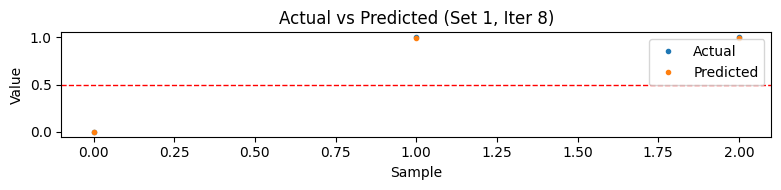

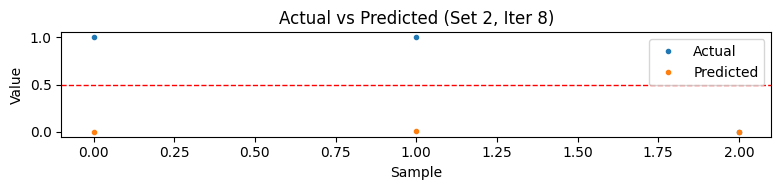

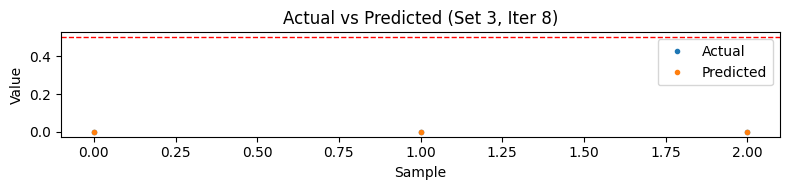

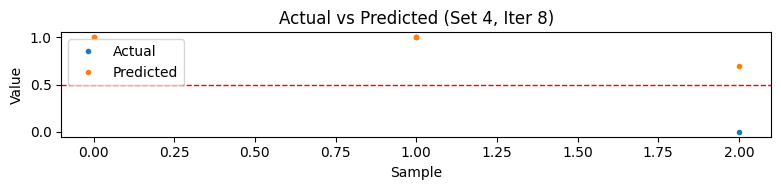

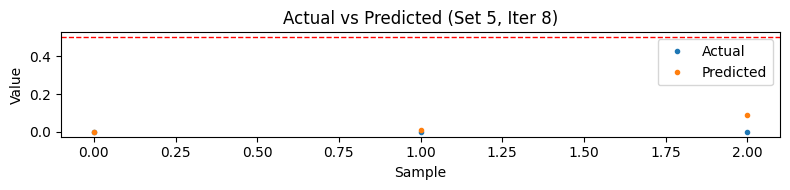

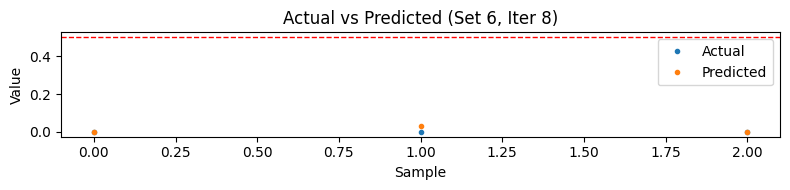

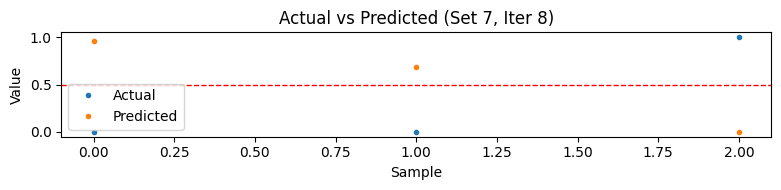

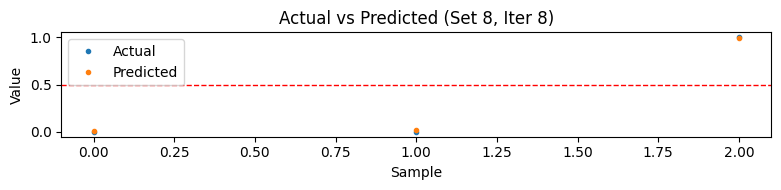

--- Running Combo 9 ---Parameters: {'learning_rate': 0.05, 'num_epochs': 150, 'batch_size': 50, 'use_bidirectional': False, 'lag': 3, 'input_size': 12, 'hidden_size': 55, 'num_layers': 1, 'use_monthly_dfs_only': True, 'use_binary_0_1_retRate': False, 'use_binary_neg1_1': False, 'use_ret_rate': False, 'use_print_acc': False, 'use_dropout': False, 'use_class_weighting': False, 'is_deterministic': True, 'seed_num': 42, 'use_monthly_predictor': False, 'use_existing_lagged_data': True, 'use_dynamic_weights': False, 'use_monthly_daily_end_mo_predictor': False, 'use_monthly_weekly_end_mo_predictor': True, 'use_binary_0_1_retRate_custom_neg': True, 'use_binary_0_1_retRate_custom_pos': False, 'binary_0_1_cutoff_ret_rate_percentage': 0.05, 'end_value_train_set_fraction': 0.85, 'val_set_fraction': 0.1, 'num_folds': 8, 'POS_weight_multiplier': 1, 'use_rolling_fixed_train_size': False, 'use_existing_initial_weights': False, 'state_dict': None}



{'combo_number': 9,
 'parameters': {'learning_rate': 0.05,
  'num_epochs': 150,
  'batch_size': 50,
  'use_bidirectional': False,
  'lag': 3,
  'input_size': 12,
  'hidden_size': 55,
  'num_layers': 1,
  'use_monthly_dfs_only': True,
  'use_binary_0_1_retRate': False,
  'use_binary_neg1_1': False,
  'use_ret_rate': False,
  'use_print_acc': False,
  'use_dropout': False,
  'use_class_weighting': False,
  'is_deterministic': True,
  'seed_num': 42,
  'use_monthly_predictor': False,
  'use_existing_lagged_data': True,
  'use_dynamic_weights': False,
  'use_monthly_daily_end_mo_predictor': False,
  'use_monthly_weekly_end_mo_predictor': True,
  'use_binary_0_1_retRate_custom_neg': True,
  'use_binary_0_1_retRate_custom_pos': False,
  'binary_0_1_cutoff_ret_rate_percentage': 0.05,
  'end_value_train_set_fraction': 0.85,
  'val_set_fraction': 0.1,
  'num_folds': 8,
  'POS_weight_multiplier': 1,
  'use_rolling_fixed_train_size': False,
  'use_existing_initial_weights': False,
  'state_dict':

In [ ]:
import math



cc = {'learning_rate': 0.05, 'num_epochs': 150, 'batch_size': 50, 'use_bidirectional': False, 'lag': 3, 'input_size': 12, 'hidden_size': 55, 'num_layers': 1, 'use_monthly_dfs_only': True, 'use_binary_0_1_retRate': False, 'use_binary_neg1_1': False, 'use_ret_rate': False, 'use_print_acc': False, 'use_dropout': False, 'use_class_weighting': False, 'is_deterministic': True, 'seed_num': 42, 'use_monthly_predictor': False, 'use_existing_lagged_data': True, 'use_dynamic_weights': False, 'use_monthly_daily_end_mo_predictor': False, 'use_monthly_weekly_end_mo_predictor': True, 'use_binary_0_1_retRate_custom_neg': True, 'use_binary_0_1_retRate_custom_pos': False, 'binary_0_1_cutoff_ret_rate_percentage': 0.05, 'end_value_train_set_fraction': 0.85, 'val_set_fraction': 0.1, 'num_folds': 8, 'POS_weight_multiplier': 1, 'use_rolling_fixed_train_size': False, 'use_existing_initial_weights': False, 'state_dict': None}


metrics , weights = run_combo_V_2(4, cc, 4, use_print_acc_vs_pred=True)
metrics

